In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,time
import sklearn
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline
import folium
import plotly.graph_objs as go
import plotly.plotly as py


In [47]:
kms_per_radian = 6371.0088

In [48]:
data=pd.read_csv('B:\SMALL.csv')
#data.head()


In [49]:
coords = data.as_matrix(columns=['latitude','longitude'])
epsilon = 1.5 / kms_per_radian

C:\Users\afsar\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [50]:
db = DBSCAN(eps=epsilon, min_samples=8, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
se = pd.Series(cluster_labels)
df = pd.DataFrame(clusters)
df2 = se.values 
df1 = df.values
print(df1)
print(df2)
f = open("C:/Users/Prashija/Desktop/MEproject/GPSTrajectory/dbscan","w")
f.write(str(df1))
f.close()


Number of clusters: 5
[[array([[ 40.71981038, -74.00258103],
       [ 40.7451638 , -73.98251878],
       [ 40.74010383, -73.98965836],
       [ 40.75159143, -73.9741214 ],
       [ 40.77942173, -73.95534113],
       [ 40.74348254, -73.994009  ],
       [ 40.74260751, -73.99270535],
       [ 40.74119055, -73.9896631 ],
       [ 40.7045885 , -74.00963933],
       [ 40.82678954, -73.94950924],
       [ 40.75527488, -73.97880614],
       [ 40.74281621, -74.00040611],
       [ 40.76067265, -74.00367709],
       [ 40.736676  , -73.98891   ],
       [ 40.79059947, -73.98023378],
       [ 40.75230661, -73.97185432],
       [ 40.74186151, -73.98943363],
       [ 40.75094552, -74.00563392],
       [ 40.74773817, -73.98519815],
       [ 40.731698  , -73.98922694],
       [ 40.82650767, -73.95039082],
       [ 40.74218831, -73.98792419],
       [ 40.7414075 , -73.98843795],
       [ 40.69743322, -73.9930433 ],
       [ 40.77807781, -73.95449162],
       [ 40.72817168, -74.00752187],
       [ 40.77

IOError: [Errno 2] No such file or directory: 'C:/Users/Prashija/Desktop/MEproject/GPSTrajectory/dbscan'

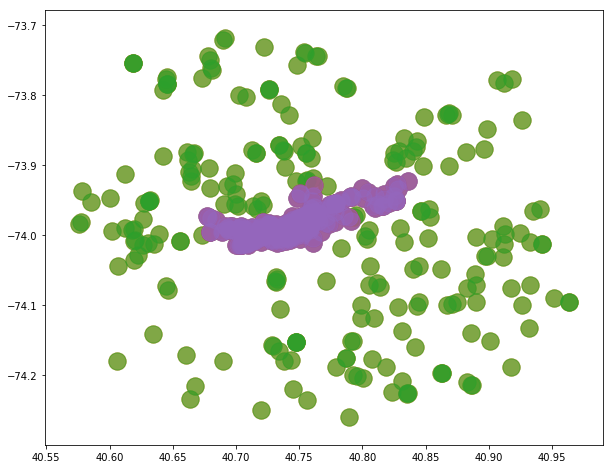

In [51]:
fig, ax = plt.subplots(figsize=[10,8])
colors = plt.cm.rainbow(np.linspace(0,1,num_clusters))
 # for each cluster label and color, plot the cluster's points
for cluster_label, color in zip(cluster_labels, colors):
    size = 300
    if cluster_label == 1:
        colour="yellow"
        size = 10
      
        

# plot the points which correspond to the current cluster 'label'
    x_coords = coords[cluster_labels==cluster_label][:,0]
    y_coords = coords[cluster_labels==cluster_label][:,1]
    ax.scatter(x=x_coords, y=y_coords,s=size, alpha=0.6)
plt.show()

In [71]:
d = pd.DataFrame(data)




In [72]:
p = pd.DataFrame(db.labels_)

In [86]:
d['cluster']= p

In [89]:
d.to_csv("d.csv", sep='\t')

In [90]:
d.to_csv("d.csv", index = False, sep=',', encoding='utf-8')

In [92]:
f = d[d.cluster != -1]

In [93]:
f.to_csv("f.csv", index = False, sep=',', encoding='utf-8')